<a href="https://colab.research.google.com/github/aishuse/Machine-Learning-Projects/blob/main/Mobile_Price_Classification%F0%9F%93%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/mobile price classification/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Check NaN Value
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [12]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
battery_power,2000,0,0.0,1094
blue,2000,0,0.0,2
clock_speed,2000,0,0.0,26
dual_sim,2000,0,0.0,2
fc,2000,0,0.0,20
four_g,2000,0,0.0,2
int_memory,2000,0,0.0,63
m_dep,2000,0,0.0,10
mobile_wt,2000,0,0.0,121
n_cores,2000,0,0.0,8


In [13]:
# Check Duplicated rows
df.duplicated().any()

False

In [14]:
df_battery_price = df.groupby('price_range')['battery_power'].mean()


In [15]:
iplot(px.line(df_battery_price,
              template='plotly_dark',
              labels={'value':'Mean of Battery Capacity','price_range':'Price Range'},
              color_discrete_sequence=['red']
              ))

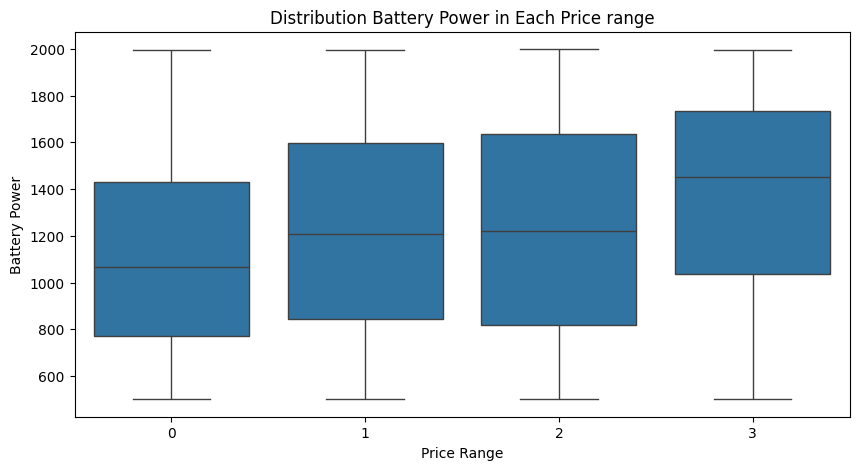

In [16]:
plt.figure(figsize=(10,5))
plt.title('Distribution Battery Power in Each Price range')
sns.boxplot(x=df['price_range'],y=df['battery_power'])
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

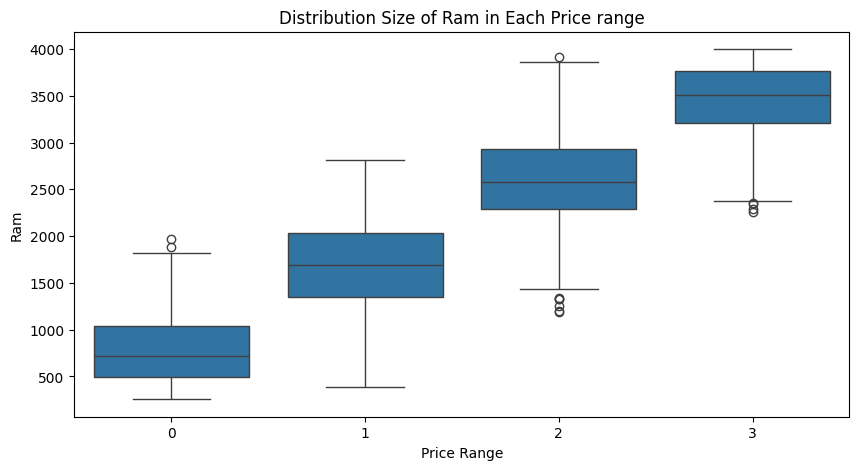

In [17]:
plt.figure(figsize=(10,5))
plt.title('Distribution Size of Ram in Each Price range')
sns.boxplot(x=df['price_range'],y=df['ram'])
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()


In [18]:
df_4g = df['four_g'].value_counts()
iplot(px.pie(values=df_4g,
             names=['Support 4G','Not Support 4G'],
             template='plotly_dark',
             title='Is Support 4G ?'
             ).update_traces(textinfo='label+percent'))

In [19]:
df_3g = df['three_g'].value_counts()
iplot(px.pie(values=df_3g,
             names=['Support 3G','Not Support 3G'],
             template='plotly_dark',
             title='Is Support 3G ?'
             ).update_traces(textinfo='label+percent'))

# split data

In [20]:
x = df.drop(columns='price_range')
y = df.price_range

In [21]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [23]:
print(f'Shape of X_Train {x_train.shape}')
print(f'Shape of X_Test {x_test.shape}')
print(f'Shape of Y_Train {y_train.shape}')
print(f'Shape of Y_Test {y_test.shape}')

Shape of X_Train (1600, 20)
Shape of X_Test (400, 20)
Shape of Y_Train (1600,)
Shape of Y_Test (400,)


In [24]:
model_params = {
    'svm':{
        'model' : SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}

In [25]:
scores = []

for model_name , mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x,y)
    scores.append({
            'model':model_name,
            'best_scores':clf.best_score_,
            'best_params':clf.best_params_
        }
    )
pd.DataFrame(scores,columns=['model','best_scores','best_params'])

,model,best_scores,best_params
0,svm,0.9675,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.8095,{'n_estimators': 10}
2,logistic_regression,0.8375,{'C': 10}


# SVM

In [26]:
model_svm = SVC(kernel='linear',C=20)
model_svm.fit(x_train,y_train)



SVC(C=20, kernel='linear')

In [27]:
score_svm_train = model_svm.score(x_train,y_train)
print(f"Train accuracy: {score_svm_train}")

Train accuracy: 0.978125


In [28]:
score_svm_test = model_svm.score(x_test,y_test)
print(f"Test accuracy: {score_svm_test}")

Test accuracy: 0.9625


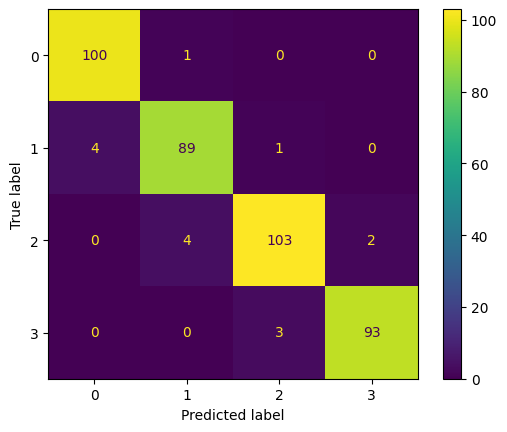

In [29]:
ConfusionMatrixDisplay.from_estimator(model_svm,
                                      x_test,
                                      y_test);

# Logestic Regression

In [30]:
model_LR = LogisticRegression(C=10)
model_LR.fit(x_train,y_train)

LogisticRegression(C=10)

In [31]:
score_LR_train = model_LR.score(x_train,y_train)
print(f"Train accuracy: {score_LR_train}")

Train accuracy: 0.975625


In [32]:
score_LR_test = model_LR.score(x_test,y_test)
print(f"Test accuracy: {score_LR_test}")

Test accuracy: 0.97


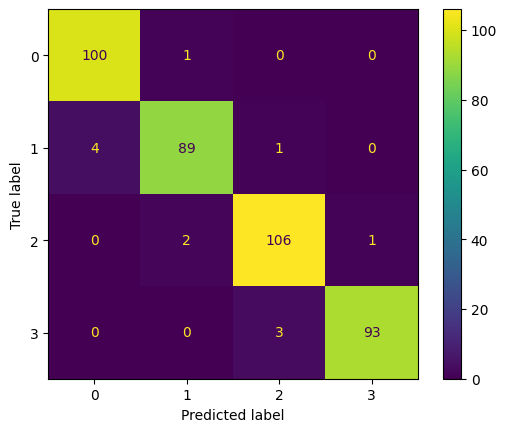

In [33]:
ConfusionMatrixDisplay.from_estimator(model_LR,
                                      x_test,
                                      y_test);

# Random Forest Classifier

In [34]:
model_RFC = RandomForestClassifier(n_estimators=10)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [35]:
score_RFC_train = model_RFC.score(x_train,y_train)
print(f"Train accuracy: {score_RFC_train}")

Train accuracy: 0.995625


In [36]:
score_RFC_test = model_RFC.score(x_test,y_test)
print(f"Test accuracy: {score_RFC_test}")

Test accuracy: 0.76
